In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [101]:
#Import Datasets

year_2015 = pd.read_csv('2015.csv')
year_2016 = pd.read_csv('2016.csv')
year_2017 = pd.read_csv('2017.csv')
year_2018 = pd.read_csv('2018.csv')
year_2019 = pd.read_csv('2019.csv')


In [102]:
#add year column to all seperate years before concating the datasets

year_2015['Year']='2015'
year_2016['Year']='2016'
year_2017['Year']='2017'
year_2018['Year']='2018'
year_2019['Year']='2019'

#year_2017


In [103]:
# Rename Columns to make them all the same for every year
# Country, Region, Overall Rank, Happiness Score, Freedom, Trust, Year
#2015
year_2015.rename(columns={'Happiness Rank': 'Rank', 'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace=True)
#2016
year_2016.rename(columns={'Happiness Rank': 'Rank', 'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace=True)
#2017
year_2017.rename(columns={'Happiness.Rank': 'Rank','Happiness.Score':'Happiness Score', 'Trust..Government.Corruption.': 'Perceptions of corruption'}, inplace=True)
#201r
year_2018.rename(columns={'Overall rank': 'Rank','Country or region': 'Country','Score':'Happiness Score','Freedom to make life choices':'Freedom'}, inplace=True)
#2019
year_2019.rename(columns={'Overall rank': 'Rank','Country or region': 'Country','Score':'Happiness Score','Freedom to make life choices':'Freedom'}, inplace=True)

#print(year_2015.head())
#print(year_2016.head())
#print(year_2017.head())
#print(year_2018.head())
#print(year_2019.head())

In [104]:
#Eliminate Columns that are not necessary

#Columns that we need: Country, Region, Happiness Rank, Happiness Score, Freedom, Trust (Government Corruption), Year

year_2015=pd.DataFrame(year_2015,columns=['Country', 'Region', 'Rank', 'Happiness Score', 'Freedom', 'Perceptions of corruption', 'Year'])

year_2016=pd.DataFrame(year_2016,columns=['Country', 'Region', 'Rank', 'Happiness Score', 'Freedom', 'Perceptions of corruption', 'Year'])

year_2017=pd.DataFrame(year_2017,columns=['Country', 'Region', 'Rank', 'Happiness Score', 'Freedom', 'Perceptions of corruption', 'Year'])

year_2018=pd.DataFrame(year_2018,columns=['Country', 'Region', 'Rank', 'Happiness Score', 'Freedom', 'Perceptions of corruption', 'Year'])

year_2019=pd.DataFrame(year_2019,columns=['Country', 'Region', 'Rank', 'Happiness Score', 'Freedom', 'Perceptions of corruption', 'Year'])


#print(year_2015.head(3))
#print(year_2016.head(3))
#print(year_2017.head(3))
#print(year_2018.head(3))
#print(year_2019.head(3))

In [105]:
country_dict=year_2015.set_index('Country').to_dict()['Region']


#Update countries in datasets with missing information
country_dict.update({'Taiwan Province of China':'Eastern Asia'})
country_dict.update({'Belize':'North America'})
country_dict.update({'Hong Kong S.A.R., China':'Eastern Asia'})
country_dict.update({'Somalia':'Sub-Saharan Africa'})
country_dict.update({'Namibia':'Sub-Saharan Africa'})
country_dict.update({'South Sudan':'Sub-Saharan Africa'})
country_dict.update({'Trinidad & Tobago':'Latin America and Caribbean'})
country_dict.update({'Northern Cyprus':'Central and Eastern Europe'})
country_dict.update({'North Macedonia':'Central and Eastern Europe'})
country_dict.update({'Gambia':'Sub-Saharan Africa'})


In [106]:
#Create Region column for dataset 2017-2019 based on 2015 data
year_2017['Region'] = year_2017['Country'].map(country_dict)
year_2018['Region'] = year_2018['Country'].map(country_dict)
year_2019['Region'] = year_2019['Country'].map(country_dict)

#year_2019.head()

In [107]:
all_years = pd.concat([year_2015, year_2016, year_2017, year_2018, year_2019])
all_years[all_years.isnull().any(axis=1)==True]

all_years['Freedom % Contribution']=all_years['Freedom']/all_years['Happiness Score']*100
all_years['Trust % Contribution']=all_years['Perceptions of corruption']/all_years['Happiness Score']*100


all_years

,Country,Region,Rank,Happiness Score,Freedom,Perceptions of corruption,Year,Freedom % Contribution,Trust % Contribution
0,Switzerland,Western Europe,1,7.587,0.66557,0.41978,2015,8.772506,5.532885
1,Iceland,Western Europe,2,7.561,0.62877,0.14145,2015,8.315963,1.870784
2,Denmark,Western Europe,3,7.527,0.64938,0.48357,2015,8.627342,6.424472
3,Norway,Western Europe,4,7.522,0.66973,0.36503,2015,8.903616,4.852832
4,Canada,North America,5,7.427,0.63297,0.32957,2015,8.522553,4.437458
...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.55500,0.41100,2019,16.646671,12.327534
152,Tanzania,Sub-Saharan Africa,153,3.231,0.41700,0.14700,2019,12.906221,4.549675
153,Afghanistan,Southern Asia,154,3.203,0.00000,0.02500,2019,0.000000,0.780518
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.22500,0.03500,2019,7.298086,1.135258


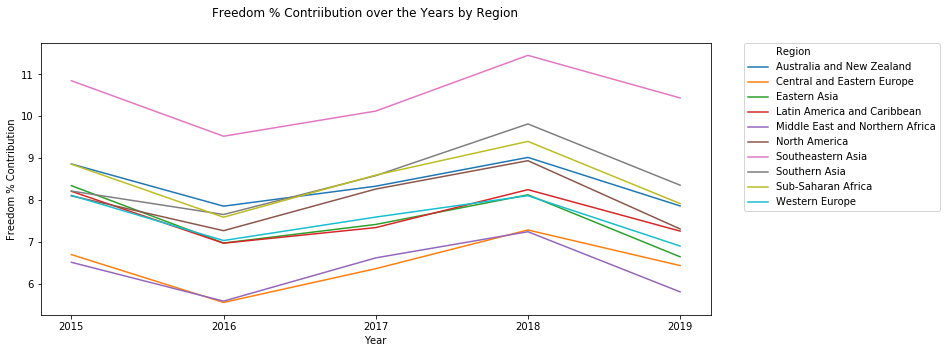

In [108]:
#Freedom % Contribution
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Freedom % Contriibution over the Years by Region')
all_year_reg = all_years.groupby(['Year', 'Region']).mean()
all_year_reg=all_year_reg.reset_index()

fig = sb.lineplot(data = all_year_reg, x= 'Year' ,y='Freedom % Contribution', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None


Now that we have our data cleaned and transformed we can start our analysis.


Lets investigate the correlation of Happiness score with Freedom and Perception of Corruption

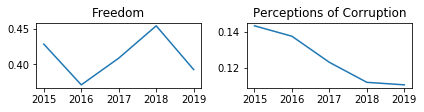

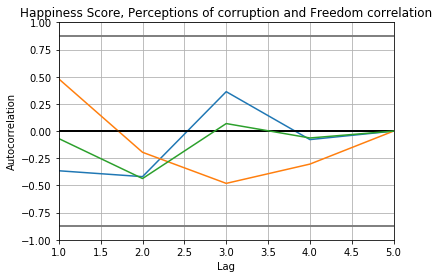

Blue = Freedom
Orange = Perceptions of corruption
Happiness Score


In [109]:
avg_f=all_years.groupby('Year').mean()
avg_f=avg_f[['Happiness Score', 'Freedom']]


avg_t=all_years.groupby('Year').mean()
avg_t=avg_t[['Happiness Score', 'Perceptions of corruption']]

from pandas.plotting import autocorrelation_plot

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax1.plot(avg_f['Freedom'])
ax1.set_title("Freedom")
ax2.plot(avg_t['Perceptions of corruption'])
ax2.set_title("Perceptions of Corruption")
plt.tight_layout()
plt.show()


autocorrelation_plot(avg_f['Freedom'])
ax1.set_title("Freedom")
autocorrelation_plot(avg_t['Perceptions of corruption'])
ax1.set_title("Perceptions of corruption")
autocorrelation_plot(avg_f['Happiness Score'])
ax1.set_title("Happiness Score-freedom")
plt.title("Happiness Score, Perceptions of corruption and Freedom correlation")
plt.show()

print ('Blue = Freedom')
print ('Orange = Perceptions of corruption')
print ("Happiness Score")


     Happiness Score  Freedom  Perceptions of corruption
0              7.587  0.66557                    0.41978
1              7.561  0.62877                    0.14145
2              7.527  0.64938                    0.48357
3              7.522  0.66973                    0.36503
4              7.427  0.63297                    0.32957
..               ...      ...                        ...
151            3.334  0.55500                    0.41100
152            3.231  0.41700                    0.14700
153            3.203  0.00000                    0.02500
154            3.083  0.22500                    0.03500
155            2.853  0.01000                    0.09100

[782 rows x 3 columns]


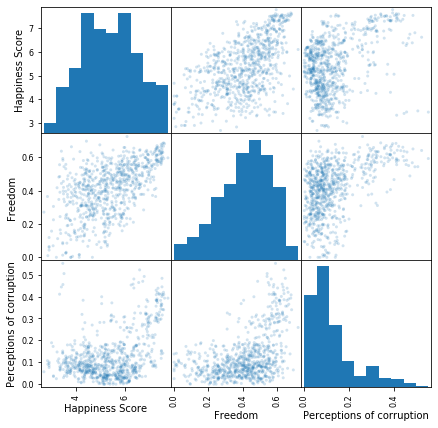

In [110]:
corr_all_years = all_years.corr()

all_years_F = all_years

all_years_F =pd.DataFrame(all_years, columns = ['Happiness Score','Freedom', 'Perceptions of corruption'])
print(all_years_F)

pd.plotting.scatter_matrix(all_years_F, alpha=0.2, figsize=(7, 7))

plt.show()

*Conclusions:*
    
    
    
    
    
    
Now let's investigate Happiness score, freedom and perceptions of corruption by regions

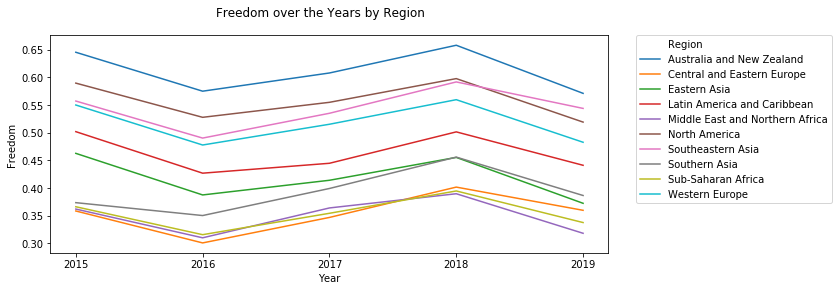

In [111]:
#Freedom over the years by regions
fig, axs = plt.subplots(figsize=(10,4))
fig.suptitle('Freedom over the Years by Region')
all_year_reg = all_years.groupby(['Year', 'Region']).mean()
all_year_reg=all_year_reg.reset_index()


fig = sb.lineplot(data = all_year_reg, x= 'Year' ,y='Freedom', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None


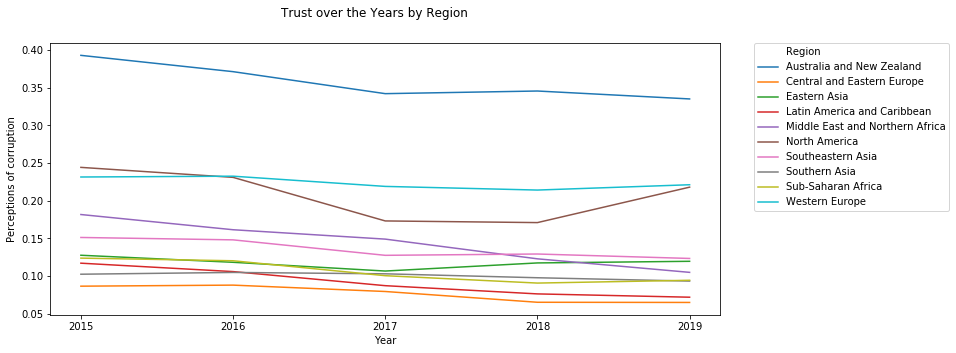

In [112]:
#Perceotions of corruption over the years by Region
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Trust over the Years by Region')
all_year_reg = all_years.groupby(['Year', 'Region']).mean()
all_year_reg=all_year_reg.reset_index()

fig = sb.lineplot(data = all_year_reg, x= 'Year' ,y='Perceptions of corruption', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None


Now that we have an idea of the Regions, let's focus on specifc countries. 
We want to get the top 5 and the bottom 5 in terms of happiness score and eveluate how thier perception of corruption and freedom have impacted the score.

In [113]:
print(all_years.max())
print(all_years.min())

Country                            Zimbabwe
Region                       Western Europe
Rank                                    158
Happiness Score                       7.769
Freedom                               0.724
Perceptions of corruption           0.55191
Year                                   2019
Freedom % Contribution               18.662
Trust % Contribution                15.9281
dtype: object
Country                                    Afghanistan
Region                       Australia and New Zealand
Rank                                                 1
Happiness Score                                  2.693
Freedom                                              0
Perceptions of corruption                            0
Year                                              2015
Freedom % Contribution                               0
Trust % Contribution                                 0
dtype: object


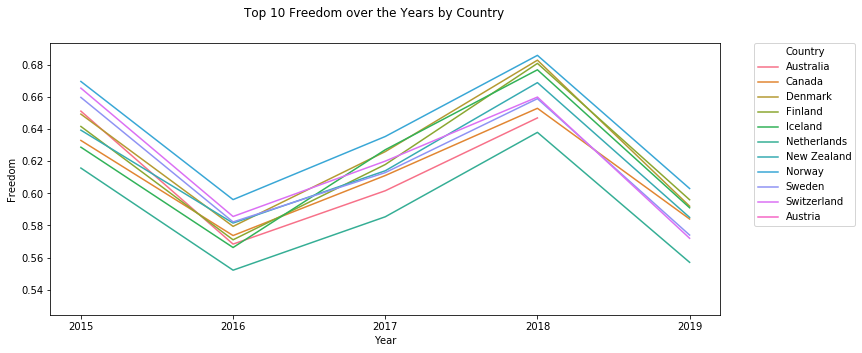

In [114]:
#Top 10 Freedom by rank

top_10_2015 = year_2015.sort_values(by= ['Rank']).head(10)
top_10_2016 = year_2016.sort_values(by= ['Rank']).head(10)
top_10_2017 = year_2017.sort_values(by= ['Rank']).head(10)
top_10_2018 = year_2018.sort_values(by= ['Rank']).head(10)
top_10_2019 = year_2019.sort_values(by= ['Rank']).head(10)



top_10_all = pd.concat([top_10_2015, top_10_2016, top_10_2017, top_10_2018, top_10_2019])


#Freedom over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Top 10 Freedom over the Years by Country')
top_10_ct = top_10_all.groupby(['Year', 'Country']).mean()
top_10_ct=top_10_ct.reset_index()

fig = sb.lineplot(data = top_10_ct, x= 'Year' ,y='Freedom', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None





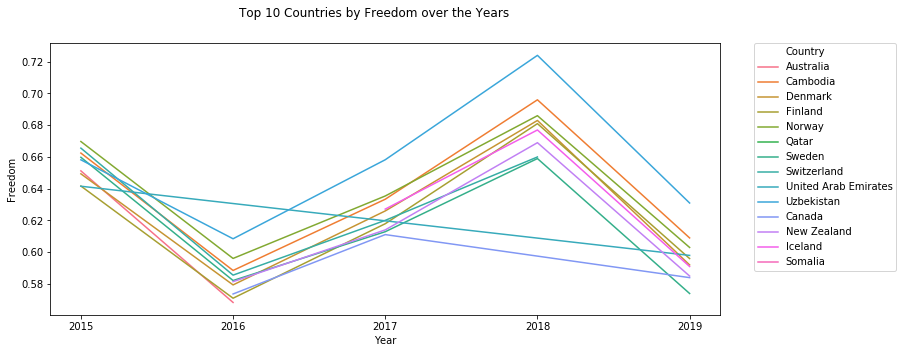

In [115]:
#Top 10 Freedom by freedom

top_10_2015_f = year_2015.sort_values(by= ['Freedom']).tail(10)
top_10_2016_f = year_2016.sort_values(by= ['Freedom']).tail(10)
top_10_2017_f = year_2017.sort_values(by= ['Freedom']).tail(10)
top_10_2018_f = year_2018.sort_values(by= ['Freedom']).tail(10)
top_10_2019_f = year_2019.sort_values(by= ['Freedom']).tail(10)



top_10_all_f = pd.concat([top_10_2015_f, top_10_2016_f, top_10_2017_f, top_10_2018_f, top_10_2019_f])


#Freedom over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Top 10 Countries by Freedom over the Years')
top_10_ct = top_10_all_f.groupby(['Year', 'Country']).mean()
top_10_ct=top_10_ct.reset_index()

fig = sb.lineplot(data = top_10_ct, x= 'Year' ,y='Freedom', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None





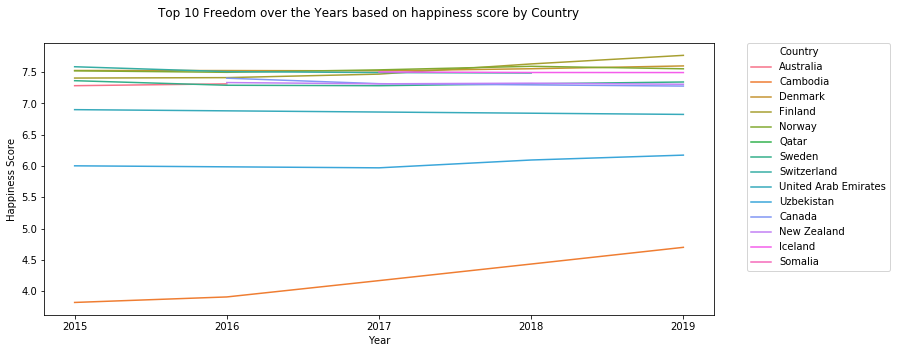

In [116]:
#Top 10 Freedom by Happiness score

#Freedom over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Top 10 Freedom over the Years based on happiness score by Country')
top_10_ct = top_10_all_f.groupby(['Year', 'Country']).mean()
top_10_ct=top_10_ct.reset_index()

fig = sb.lineplot(data = top_10_ct, x= 'Year' ,y='Happiness Score', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None





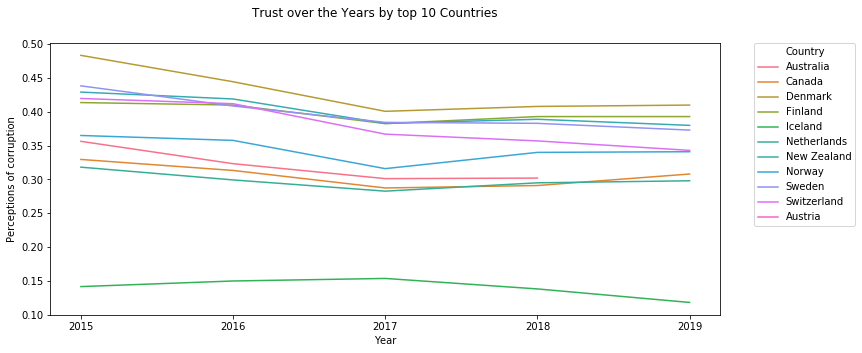

In [117]:
#Top 10 Perceptions of Corruption

#Perceotions of corruption over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Trust over the Years by top 10 Countries')
top_10_ct = top_10_all.groupby(['Year', 'Country']).mean()
top_10_ct=top_10_ct.reset_index()

fig = sb.lineplot(data = top_10_ct, x= 'Year' ,y='Perceptions of corruption', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None



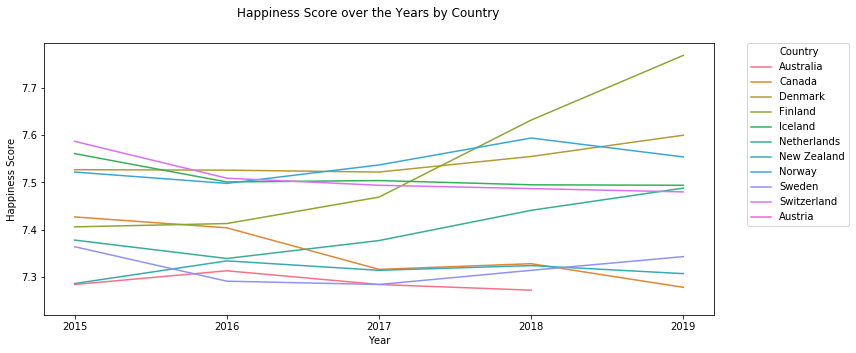

In [118]:
#Top 10 Happiness Score

#Happiness Score over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Happiness Score over the Years by Country')
top_10_ct = top_10_all.groupby(['Year', 'Country']).mean()
top_10_ct=top_10_ct.reset_index()

fig = sb.lineplot(data = top_10_ct, x= 'Year' ,y='Happiness Score', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None



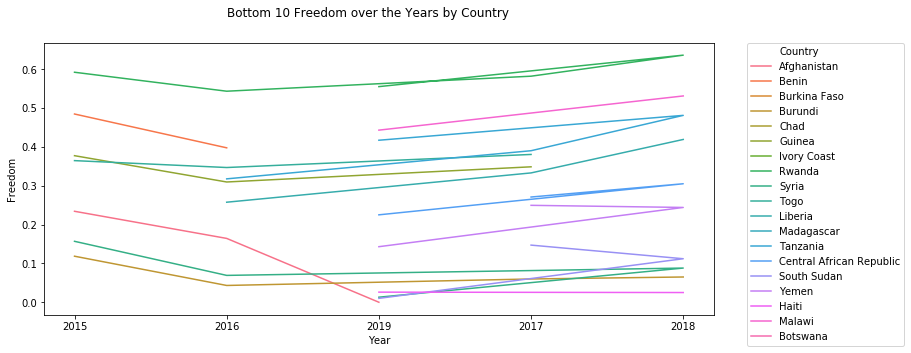

In [119]:
#Bottom 10 Freedom

bot_10_2015 = year_2015.sort_values(by= ['Rank']).tail(10)
bot_10_2016 = year_2016.sort_values(by= ['Rank']).tail(10)
bot_10_2017 = year_2017.sort_values(by= ['Rank']).tail(10)
bot_10_2018 = year_2018.sort_values(by= ['Rank']).tail(10)
bot_10_2019 = year_2019.sort_values(by= ['Rank']).tail(10)



bot_10_all = pd.concat([bot_10_2015, bot_10_2016, bot_10_2017, bot_10_2018, bot_10_2019])


#Freedom over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Bottom 10 Freedom over the Years by Country')
bot_10_ct = bot_10_all.groupby(['Year', 'Country']).mean()
bot_10_ct=bot_10_ct.reset_index()

fig = sb.lineplot(data = bot_10_ct, x= 'Year' ,y='Freedom', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None





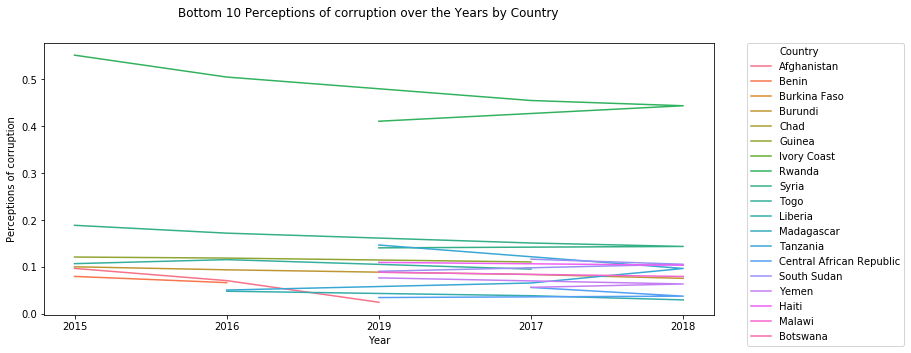

In [120]:
#Bottom 10 Perceptions of corruption over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Bottom 10 Perceptions of corruption over the Years by Country')
bot_10_ct = bot_10_all.groupby(['Year', 'Country']).mean()
bot_10_ct=bot_10_ct.reset_index()

fig = sb.lineplot(data = bot_10_ct, x= 'Year' ,y='Perceptions of corruption', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None



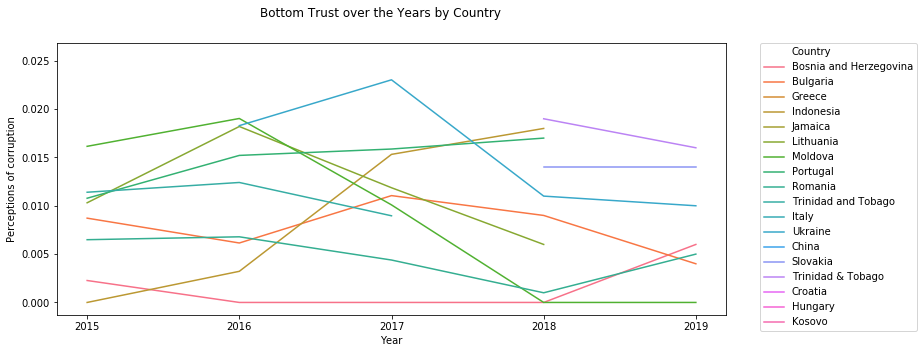

In [125]:
#Bottom 10 Trust by Trust

bot_10_2015_t = year_2015.sort_values(by= ['Perceptions of corruption']).head(10)
bot_10_2016_t = year_2016.sort_values(by= ['Perceptions of corruption']).head(10)
bot_10_2017_t = year_2017.sort_values(by= ['Perceptions of corruption']).head(10)
bot_10_2018_t = year_2018.sort_values(by= ['Perceptions of corruption']).head(10)
bot_10_2019_t = year_2019.sort_values(by= ['Perceptions of corruption']).head(10)



bot_10_all_t = pd.concat([bot_10_2015_t, bot_10_2016_t, bot_10_2017_t, bot_10_2018_t, bot_10_2019_t])


#Freedom over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Bottom Trust over the Years by Country')
bot_10_ct_t = bot_10_all_t.groupby(['Year', 'Country']).mean()
bot_10_ct_t=bot_10_ct_t.reset_index()

fig = sb.lineplot(data = bot_10_ct_t, x= 'Year' ,y='Perceptions of corruption', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None





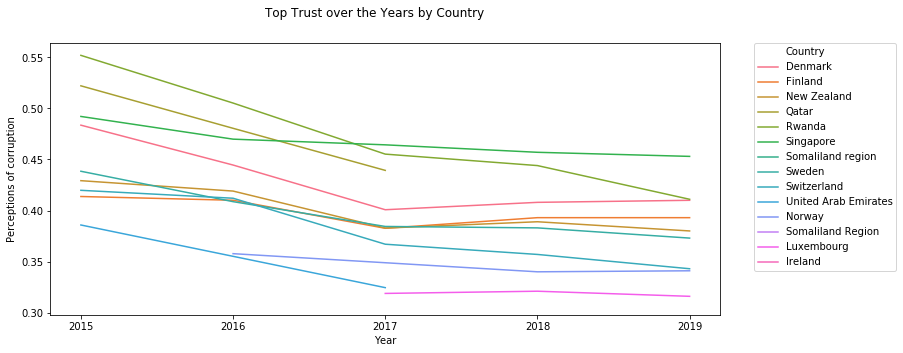

In [127]:
#Top 10 Trust by Trust

top_10_2015_t = year_2015.sort_values(by= ['Perceptions of corruption']).tail(10)
top_10_2016_t = year_2016.sort_values(by= ['Perceptions of corruption']).tail(10)
top_10_2017_t = year_2017.sort_values(by= ['Perceptions of corruption']).tail(10)
top_10_2018_t = year_2018.sort_values(by= ['Perceptions of corruption']).tail(10)
top_10_2019_t = year_2019.sort_values(by= ['Perceptions of corruption']).tail(10)



top_10_all_t = pd.concat([top_10_2015_t, top_10_2016_t, top_10_2017_t, top_10_2018_t, top_10_2019_t])


#Freedom over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Top Trust over the Years by Country')
top_10_ct_t = top_10_all_t.groupby(['Year', 'Country']).mean()
top_10_ct_t=top_10_ct_t.reset_index()

fig = sb.lineplot(data = top_10_ct_t, x= 'Year' ,y='Perceptions of corruption', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None





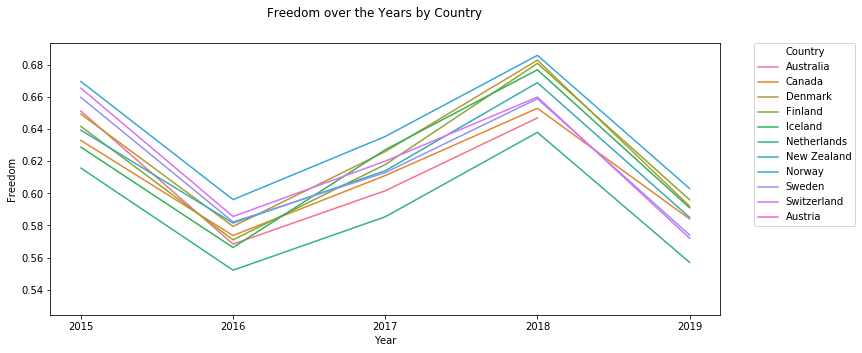

In [122]:
#Top 10 Freedom by freedom

bot_10_2015_f = year_2015.sort_values(by= ['Freedom']).head(10)
bot_10_2016_f = year_2016.sort_values(by= ['Freedom']).head(10)
bot_10_2017_f = year_2017.sort_values(by= ['Freedom']).head(10)
bot_10_2018_f = year_2018.sort_values(by= ['Freedom']).head(10)
bot_10_2019_f = year_2019.sort_values(by= ['Freedom']).head(10)



bot_10_all_f = pd.concat([bot_10_2015_f, bot_10_2016_f, bot_10_2017_f, bot_10_2018_f, bot_10_2019_f])


#Freedom over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Freedom over the Years by Country')
bot_10_ct = bot_10_all_f.groupby(['Year', 'Country']).mean()
bot_10_ct=bot_10_ct.reset_index()

fig = sb.lineplot(data = top_10_ct, x= 'Year' ,y='Freedom', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None





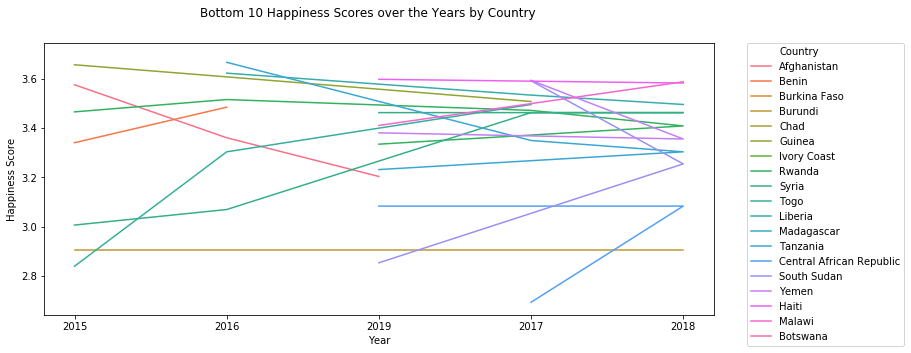

In [123]:
#Bottom 5 Happiness Score over the years by Country
fig, axs = plt.subplots(figsize=(12,5))
fig.suptitle('Bottom 10 Happiness Scores over the Years by Country')
bot_10_ct = bot_10_all.groupby(['Year', 'Country']).mean()
bot_10_ct=bot_10_ct.reset_index()

fig = sb.lineplot(data = bot_10_ct, x= 'Year' ,y='Happiness Score', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None

